In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn

import sys
# sys.path.append("../")

from Utils.dataset import FreiHAND
from Utils.model import ShallowUNet
from Utils.trainer import Trainer
from Utils.utils import (
    blur_heatmaps,
    IoULoss,
    COLORMAP,
    N_KEYPOINTS,
    N_IMG_CHANNELS,
    get_norm_params,
    show_data,
)

In [3]:
config = {
    "data_dir": "FreiHAND_pub_v2",
    "epochs": 1000,
    "batch_size": 128,
    "batches_per_epoch": 50,
    "batches_per_epoch_val": 20,
    "learning_rate": 0.1,
    "device": torch.device("cuda" if torch.cuda.is_available() else "cpu"),
}

In [4]:
train_dataset = FreiHAND(config=config, set_type="train")
train_dataloader = DataLoader(
    train_dataset, config["batch_size"], shuffle=True, drop_last=True, num_workers=2
)

val_dataset = FreiHAND(config=config, set_type="val")
val_dataloader = DataLoader(
    val_dataset, config["batch_size"], shuffle=True, drop_last=True, num_workers=2
)

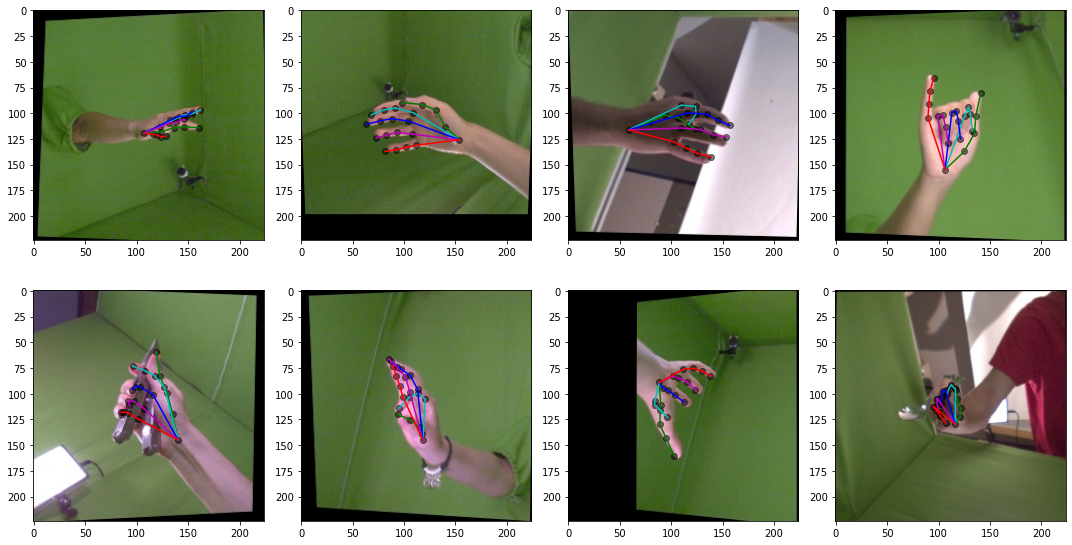

In [5]:
show_data(train_dataset, n_samples=8)

In [6]:
model = ShallowUNet(N_IMG_CHANNELS, N_KEYPOINTS)
model = model.to(config["device"])

criterion = IoULoss()
optimizer = optim.SGD(model.parameters(), lr=config["learning_rate"])
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer=optimizer, factor=0.5, patience=20, verbose=True, threshold=0.00001
)

In [7]:
trainer = Trainer(model, criterion, optimizer, config, scheduler)
model = trainer.train(train_dataloader, val_dataloader)

Epoch: 1/1000, Train Loss=0.9930773973, Val Loss=0.9930581053
Epoch: 2/1000, Train Loss=0.9930314422, Val Loss=0.9930164842
Epoch: 3/1000, Train Loss=0.9929769635, Val Loss=0.9929658458
Epoch: 4/1000, Train Loss=0.9929277897, Val Loss=0.9929070728
Epoch: 5/1000, Train Loss=0.9928501248, Val Loss=0.9928340742
Epoch: 6/1000, Train Loss=0.9927865267, Val Loss=0.9927693492
Epoch: 7/1000, Train Loss=0.9926928878, Val Loss=0.9926675217
Epoch: 8/1000, Train Loss=0.9926036596, Val Loss=0.9925775102
Epoch: 9/1000, Train Loss=0.9924783707, Val Loss=0.9924584911
Epoch: 10/1000, Train Loss=0.9923292398, Val Loss=0.9923121475
Epoch: 11/1000, Train Loss=0.9921577573, Val Loss=0.992103764
Epoch: 12/1000, Train Loss=0.9919430614, Val Loss=0.9919190833
Epoch: 13/1000, Train Loss=0.9916148186, Val Loss=0.9916075553
Epoch: 14/1000, Train Loss=0.9912676811, Val Loss=0.9912407086
Epoch: 15/1000, Train Loss=0.990740478, Val Loss=0.9907224519
Epoch: 16/1000, Train Loss=0.989926815, Val Loss=0.9898774794
Epoc

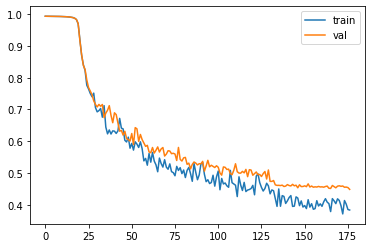

In [8]:
plt.plot(trainer.loss["train"], label="train")
plt.plot(trainer.loss["val"], label="val")
plt.legend()
plt.show()